### Mindterm question 1

1.  Wet bulb equation (15 points):

    Starting with the first law in the form of (10),
    derive the an equation that could be used to find the vapor mixing
    ratio $r_v$ using a wet bulb thermometer, stating any assumptions.
    Explain briefly in a couple of sentences how the wetbulb thermometer
    works ‚Äì i.e. what it measures, and how you would use those
    measurements and your equation to find $r_v$.


Equation 10 says:

$dh = T\,d\phi + \alpha\,dp\ \mathrm(reversible)$

and Equation 9 defines dh for a mixture of dry air and vapor as:

$dh = c_p\, dT\ + l_v\,dr_v\ \mathrm(air/water\ mixture)$


At constant pressure $dp=0$, and if there is no diabatic process then

$dh = c_p\, dT\ + l_v\,dr_v\ = 0$

where $c_p$ is the heat capacity of the mixture and $l_v$ is the temperature-dependent enthalpy of evaporation. 

or in other words, 

$h=c_p T + l_v r_v$ =constant.   

So  put two thermometers side by side, one with a cotton wick that is dipped in liquid water.   If air at temperature $T_0$ and vapor mixinrg ratio $r_v$ is pulled past the two thermometers it comes into saturated equilibrium with the moist wick, and the energy used to evaporate the water to produce saturation lowers the wet bulb temperature to temperature $T_w$ and increases the vapor mixing ratio to $r_s(T_w,press)$, where $r_s$ is the saturation mixing ratio at pressure=press given by the Clausius-Clapeyron equation.  If we approximate $c_p = c_{pd}$ and $l_v(T) = l_v(T_0)$ then conservation of energy says:

$c_p T_0 + l_v r_v = c_p T_w + l_v r_s(T_w,press)$


So we can measure $T_0$ and $T_w$ from the two thermometers, calculate $r_s(T_w,press)$ in python or look it up on a tephigram, and solve for $r_v$.



### python detour -- using a closure to help simplify formatting (see e.g. [this tutorial](http://www.programiz.com/python-programming/closure) )

Here's a useful trick to make string formatting a little more readable -- make a function
that wraps the value you want to print

In [1]:
#
# python detour -- clean up my printing by making a helper function
# that wraps my numbers and turns them into strings
#
# do this by define a **closure** *f* that returns  number-formatting function *s*
# to be used in printing below
#
def f(fmtstring='{:5.2f}'):
    """given a formatting string, return a function that
       takes a single number and returns a string created
       using that format
    """
    def s(the_num):
        out=fmtstring.format(the_num)
        return out
    return s
#
# now make one of these functions with the default 5.2f format
#
n = f()
#
# and another function with exponential format
#
e = f(fmtstring = '{:6.3e}')
#
#  use n() below like this
#
print('here0: {} K'.format(n(273.14156)))
print('here1: {} K'.format(e(273.14156)))
#
#write a regular function to convert from K to deg C
#
from a405thermo.constants import constants as c
def k2c(temp): return (temp - c.Tc)
print('here2: {} deg C'.format(n(k2c(300))))

here0: 273.14 K
here1: 2.731e+02 K
here2: 26.85 deg C


### back to midterm question 2:  make the tephigram -- with LCLs as black dots

temp,Tdew,rv at LCL press:  860.00 hPa 1.501e+01 C 1.501e+01 C 1.258e-02 kg/kg
temperature and dewpoint at 900.00 hPa hPa = 1.876e+01 C 1.572e+01 C
temp,Tdew, rv at LCL press: 700.00 hPa: 4.950e+00 C  4.950e+00 C 7.820e-03 kg/kg
temperature and dewpoint at 800.00 hPa = 15.73 C  6.88 C
thetaes at 700.0 = 332.00 K
 thetaes at 860.0 = 338.00 K
entropy for 860 hPa = 5.856e+03
wet bulb potential temperature for 900 hPa air = 20.61 C


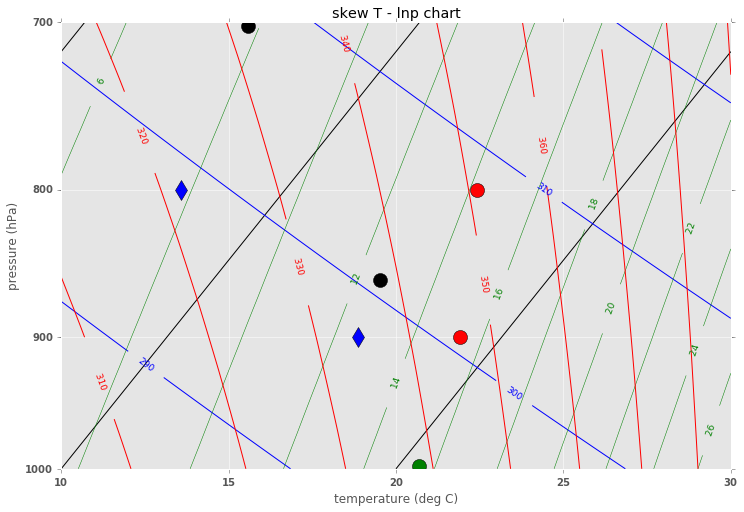

In [5]:
%matplotlib inline
pa2hPa=1.e-2
from importlib import reload
import a405skewT.makeSkewII
reload(a405skewT.makeSkewII)
from a405skewT.makeSkewII import makeSkewWet
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax, skew = makeSkewWet(ax,corners=[10,30])
ax.set(ylim=[1000,700])
from a405thermo.thermlib import find_Tmoist,find_rsat,find_Td,tinvert_thetae,convertTempToSkew,\
              find_lcl
import a405thermo.thermlib as tl
#
# set the lcl for 900 hPa to 860 hPa and thetae to 338 K
#
press=860.e2
thetae_900=338.  #K
Temp_860=find_Tmoist(thetae_900,press)
rv_860=find_rsat(Temp_860,press)
rv_900 = rv_860  #vapor is conserved
Tdew_860=Temp_860
print("temp,Tdew,rv at LCL press:  {} hPa {} C {} C {} kg/kg"\
      .format(n(press*1.e-2),e(k2c(Temp_860)),e(k2c(Tdew_860)),e(rv_900)))
#
# now descend adiabatically to 900 hPa
#
press=900.e2
Temp_900,rv_900,rl_900=tinvert_thetae(thetae_900,rv_900,press)
Tdew_900=find_Td(rv_900,press)
print("temperature and dewpoint at {} hPa hPa = {} C {} C".format(n(press*1.e-2),e(k2c(Temp_900)), e(k2c(Tdew_900))))
#
#  draw these on the sounding at 900 hPa as a red circle and blue diamond
#
xplot=convertTempToSkew(Temp_900 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ro', markersize=14, markerfacecolor='r')
xplot=convertTempToSkew(Tdew_900 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'bd', markersize=14, markerfacecolor='b')
#
#now look at an LCL of 700 hPa  -- with thetae = 332 K
#
press=700.e2
thetae_800=332.  #K
Temp_700=find_Tmoist(thetae_800,press)
Tdew_700 = Temp_700
rv_700=find_rsat(Temp_700,press)

print("temp,Tdew, rv at LCL press: {} hPa: {} C  {} C {} kg/kg"\
      .format(n(press*1.e-2),e(k2c(Temp_700)),e(k2c(Tdew_700)),e(rv_700)))
# get the temperature and dewpoint at 800 hPa
#
press=800.e2
rv_800=rv_700   #total water is conserved
Temp_800,rv_800,rl=tinvert_thetae(thetae_800,rv_800,press)
Tdew_800=find_Td(rv_800,press)
print("temperature and dewpoint at {} hPa = {} C {} C".format(n(press*1.e-2),n(k2c(Temp_800)),n(k2c(Tdew_800))))
#
# put these points on the sounding at 800 hPa
#
xplot=convertTempToSkew(Temp_800 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ro', markersize=14, markerfacecolor='r')
xplot=convertTempToSkew(Tdew_800 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'bd', markersize=14, markerfacecolor='b')
#
# draw the two LCLs as black circles
#
press=860.e2
xplot=convertTempToSkew(Temp_860 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ko', markersize=14, markerfacecolor='k')
press=702.e2  #add 2 hPa so we can see it
xplot=convertTempToSkew(Temp_700 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'ko', markersize=14, markerfacecolor='k')
fig.savefig('mid-tephi.pdf')


press=700.e2
thetaes_700 = tl.find_thetaes(Temp_700,press)
print('thetaes at {} = {} K'.format(press*1.e-2,n(thetaes_700)))

press=860.e2
thetaes_860 = tl.find_thetaes(Temp_860,press)
print(' thetaes at {} = {} K'.format(press*1.e-2,n(thetaes_860)))
print('entropy for 860 hPa = {}'.format(e(c.cpd*np.log(thetaes_860))))

#
#wet bulb temp potential temperature for 900 hPa  -- bring air to 1000 hPa
#along a moist adiabat
#
press = 1.e5
Temp_1000=find_Tmoist(thetae_900,press)
print('wet bulb potential temperature for 900 hPa air = {} C'.format(n(k2c(Temp_1000))))
#
# add as a green circle
#
press=998.e2  #subtrack 2 hPa so we can see it
xplot=convertTempToSkew(Temp_1000 - c.Tc,press*pa2hPa,skew)
bot=ax.plot(xplot, press*pa2hPa, 'go', markersize=14, markerfacecolor='g')

2\.  Tephigram (12 points):

    1.  The attached tephigram shows the temperature (circle) and
        dewpoint (diamond) for air at 900 hPa and 800 hPa Find (showing
        your work on the tephigram):

        -   The LCL (hPa) of the 900 hPa air
        
            - **860 hPa**

        -   The equivalent potential temperature $\theta_e$ (K)
        
            - **338 K**

        -   The entropy $\phi$ (J/kg/K) or the 900 hPa air
        
             - **5848 J/kg/K**

        -   The wet bulb potential temperature $\theta_w$ (K) of the 900
            hPa air
            
            - **20.61 deg C**

    2.  Is the air at 900 hPa absolutely stable, conditionally unstable,
        or unstable? Explain
        
       absolutely stable because the temperature lapse rate is more stable than the 350 K moist adiabat

    3.  Is the layer between 900 hPa and 800 hPa convectively
        unstable? Explain.
        
        
       Convectively unstable because if the layer was lifted until the top was at 700 the entire
       layer would be along its thetae sounding, where the temperature decreases with height.
       



3\.  Mixing (15 points):

    Suppose air at 900 hPa is lifted adiabatically to 800 hPa, where it
    mixes 50/50 with air at that level. 

    1.  Using the tephigram what is the LCL of the resulting mixture? 
        Clearly label your work, including the tephigram.

    2.  Suppose you were asked to write a python program to find
        this answer. You have a library that has the following routines
        used in the course:

        1.  find_thetaet(Td, rt, T, p) that calculates $\theta_e$ for a
            parcel

        2.  find_rsat(temp, press) that calculates the saturation mixing
            ratio

        3.  tinvert_thetae(thetaeVal, rT, press) that finds temp, rv, rl
            given thetae, rT and pressure

        4.  find\_interval(the\_func, x, \*args) that brackets a root for
            function the\_func

        5.  fzero(the\_func, root\_bracket, \*args, \*\*parms) that finds
            the root of the\_func given a bracket

        Describe using python pseudocode how you would use these
        routines, plus anything else you needed, to find the LCL (hPa)
        given the $\theta_e$ and $r_T$ of the mixture at 800 hPa.

### 3\. A:  find the LCL temperature and pressure (cyan dot below)

50/50 mixture of the logthetas is 334.99 K
50/50 mixture of the rTs is 10.20 g/kg
temperature and pressure of LCL is 10.40 C and 780.99 hPa


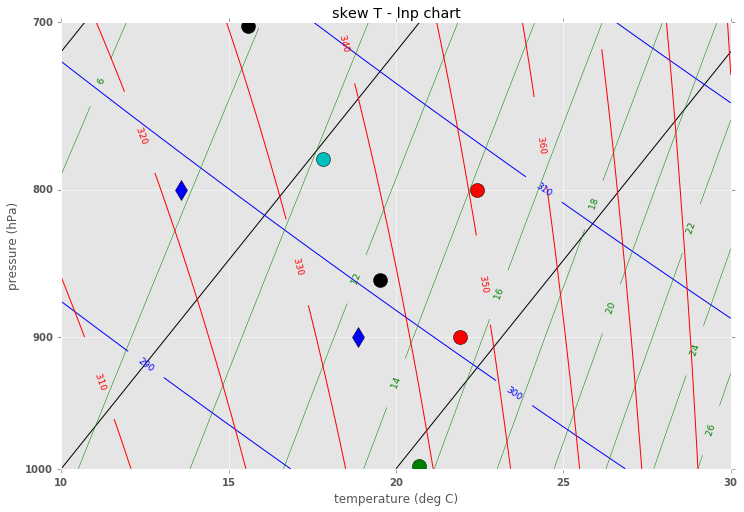

In [3]:
logmix= 0.5*np.log(thetae_900) + 0.5*np.log(thetae_800)
thetae_mix=np.exp(logmix)
print('50/50 mixture of the logthetas is {} K'.format(n(thetae_mix)))
rt_mix = 0.5*rv_900 + 0.5*rv_800
print('50/50 mixture of the rTs is {} g/kg'.format(n(rt_mix*1.e3)))
temp_1000,rvap_1000,rl_1000=tinvert_thetae(thetae_mix,rt_mix,1.e5)
td_1000 = find_Td(rt_mix,1.e5)
Tlcl,plcl = find_lcl(td_1000,temp_1000,1.e5)
print('temperature and pressure of LCL (cyan dot) is {} C and {} hPa'.format(n(k2c(Tlcl)),n(plcl*1.e-2)))
#
#  draw this as a cyan circle
#
xplot=convertTempToSkew(Tlcl - c.Tc,plcl*pa2hPa,skew)
bot=ax.plot(xplot, plcl*pa2hPa, 'co', markersize=14, markerfacecolor='c')
display(fig)

### 3\.B program to find LCL of mixture

Strategy -- The lcl is the pressure where the total mixing ratio $r_T$=$r_v$, the vapor mixing
ratio for the air.  So use the rootfinder to zero this difference as a function of pressure,
keeping the thetae and rT of the mixture constant.  The catch is that,
everywhere below cloudbase the difference is also zero, so below cloud base we want
to replace rv with rsat, the saturation vapor pressure at that temperature and pressure. Thus the difference
will flip from negative to positive as we approach cloudbase from below.

In [4]:
def rv_diff(press,thetae_mix,rT_mix):
    """
      the lcl is is the pressure where rv=rT_mix
      we want a difference that changes sign at cloud base
      so below cloud set rv = rsat(temp,press) and 
      rT_mix - rv will be negative below cloud base and 
      positive above cloud base
    """
    Temp, rv, rl = tinvert_thetae(thetae_mix,rT_mix,press)
    #
    # below cloud rl ~ 0, so switch to rv=rsat
    #
    if rl < 1.e-5:
        rv=find_rsat(Temp,press)
    diff = rT_mix - rv
    return diff

from a405thermo.rootfinder import find_interval,fzero
bracket=find_interval(rv_diff,7.e4,thetae_mix,rt_mix)
print('found bracket =',bracket)
lcl_press=fzero(rv_diff,bracket,thetae_mix,rt_mix)
print('the lcl pressure is {} hPa'.format(n(lcl_press*1.e-2)))

found bracket = (58799.999999999993, 81200.0)
the lcl pressure is 780.98 hPa
